# Boom Bikes Linear Regression Assignment

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading dataset
bike = pd.read_csv('/Users/amarpreetsinghvandra/Desktop/UpGrad/upgrad jupyter/Bike sharing LR Assignment/day.csv')

### Reading the data

In [4]:
bike.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the dataset


##### Checking for rows and coulmns

In [5]:
bike.shape 

(730, 16)

##### Checking dimensions

In [6]:
bike.ndim

2

##### Checking the column-wise info of the dataframe

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Checking the summary for the numeric columns

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Initial thoughts

Bike dataset has 730 rows and 16 columns.

Except one column (dteday), all other are either float or integer type.

One column (dteday) is object type but can be coverted into datetime type.


### Data quality checks 

##### Looking at Null Values

In [9]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### There are no missing / Null values

In [10]:
#Rename the columns for better understanding of variables
bike.rename(columns={'instant':'rec_id','dteday':'date','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [11]:
bike.head()

,rec_id,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Changing variable type

In [12]:
bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [13]:
bike.weather_condition.value_counts()

1    463
2    246
3     21
Name: weather_condition, dtype: int64

In [14]:
# type casting to object from int
bike.year=bike.year.map({1:'2019', 0:'2018', 3:'fall'})
bike.season=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.weather_condition=bike.weather_condition.map({1:'Good', 2:'Neutral', 3:'Bad', 4:'Worse'})
bike.month=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.weekday=bike.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
bike.workingday=bike.workingday.map({1:'Yes',0:'No'})
bike.holiday=bike.holiday.map({1:'No', 0:'Yes'})


##### weather_condition glossary
good = Clear, Few clouds, Partly cloudy, Partly cloudy <br>
Neutral = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
Bad =  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
Worse = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (no record of 4 in the dataset but still considering it)

In [15]:
bike.weather_condition.value_counts()

Good       463
Neutral    246
Bad         21
Name: weather_condition, dtype: int64

In [16]:
bike.head()

,rec_id,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,spring,2018,Jan,Yes,Mon,Yes,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,Yes,Tue,Yes,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,Yes,Wed,Yes,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,Yes,Thu,Yes,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,Yes,Fri,Yes,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
# Converting date to datetime format
bike['date'] = pd.to_datetime(bike['date'])

In [18]:
# rechecking df info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             730 non-null    int64         
 1   date               730 non-null    datetime64[ns]
 2   season             730 non-null    object        
 3   year               730 non-null    object        
 4   month              730 non-null    object        
 5   holiday            730 non-null    object        
 6   weekday            730 non-null    object        
 7   workingday         730 non-null    object        
 8   weather_condition  730 non-null    object        
 9   temp               730 non-null    float64       
 10  atemp              730 non-null    float64       
 11  humidity           730 non-null    float64       
 12  windspeed          730 non-null    float64       
 13  casual             730 non-null    int64         
 14  registered

In [19]:
# Extracting Object df
ojbects = bike.loc[:, (bike.dtypes == 'object')]
ojbect_col = list(ojbects) # list of object columns
ojbect_col

['season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weather_condition']

In [20]:
# Extracting Numeric df
int_cols = bike.loc[:, (bike.dtypes == 'int64')]
float_col = bike.loc[:, (bike.dtypes=='float64')]
numeric = pd.concat([int_cols,float_col],axis=1)
numeric_col = list(numeric) # list of numeric columns
numeric_col

['rec_id',
 'casual',
 'registered',
 'total_count',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

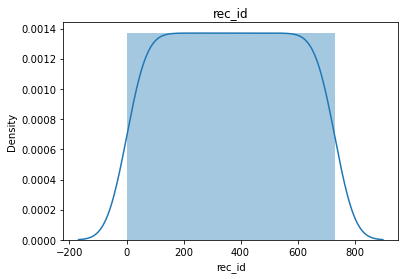

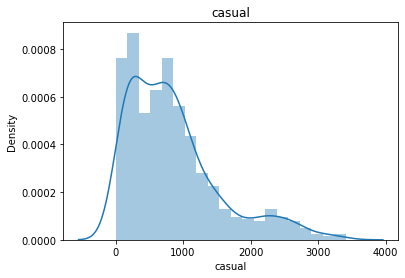

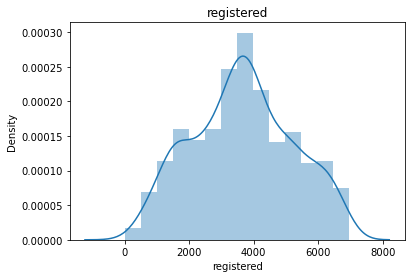

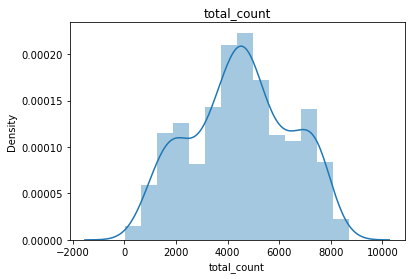

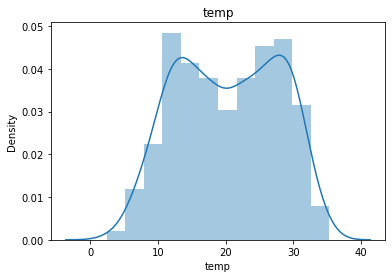

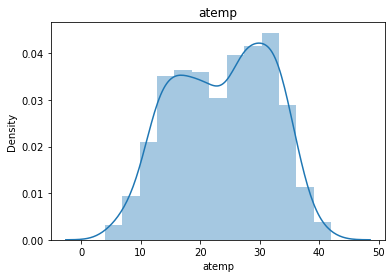

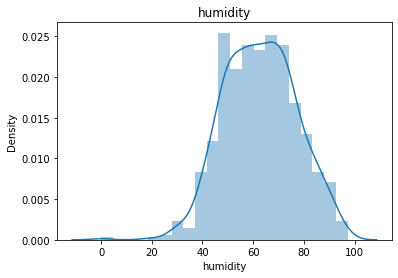

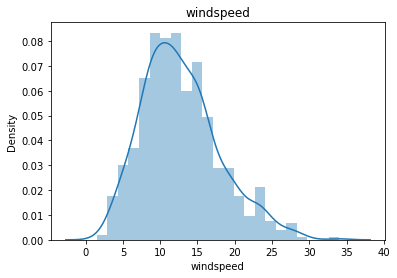

In [21]:
# looking at the distribution of numeric variables
for x in numeric_col:
    sns.distplot(bike[x])
    plt.title(x)
    plt.show()

##### Insights

Total_count & temp is normally distributed.

Windspeed and humidity do have a certain degree of skewness to right and left.

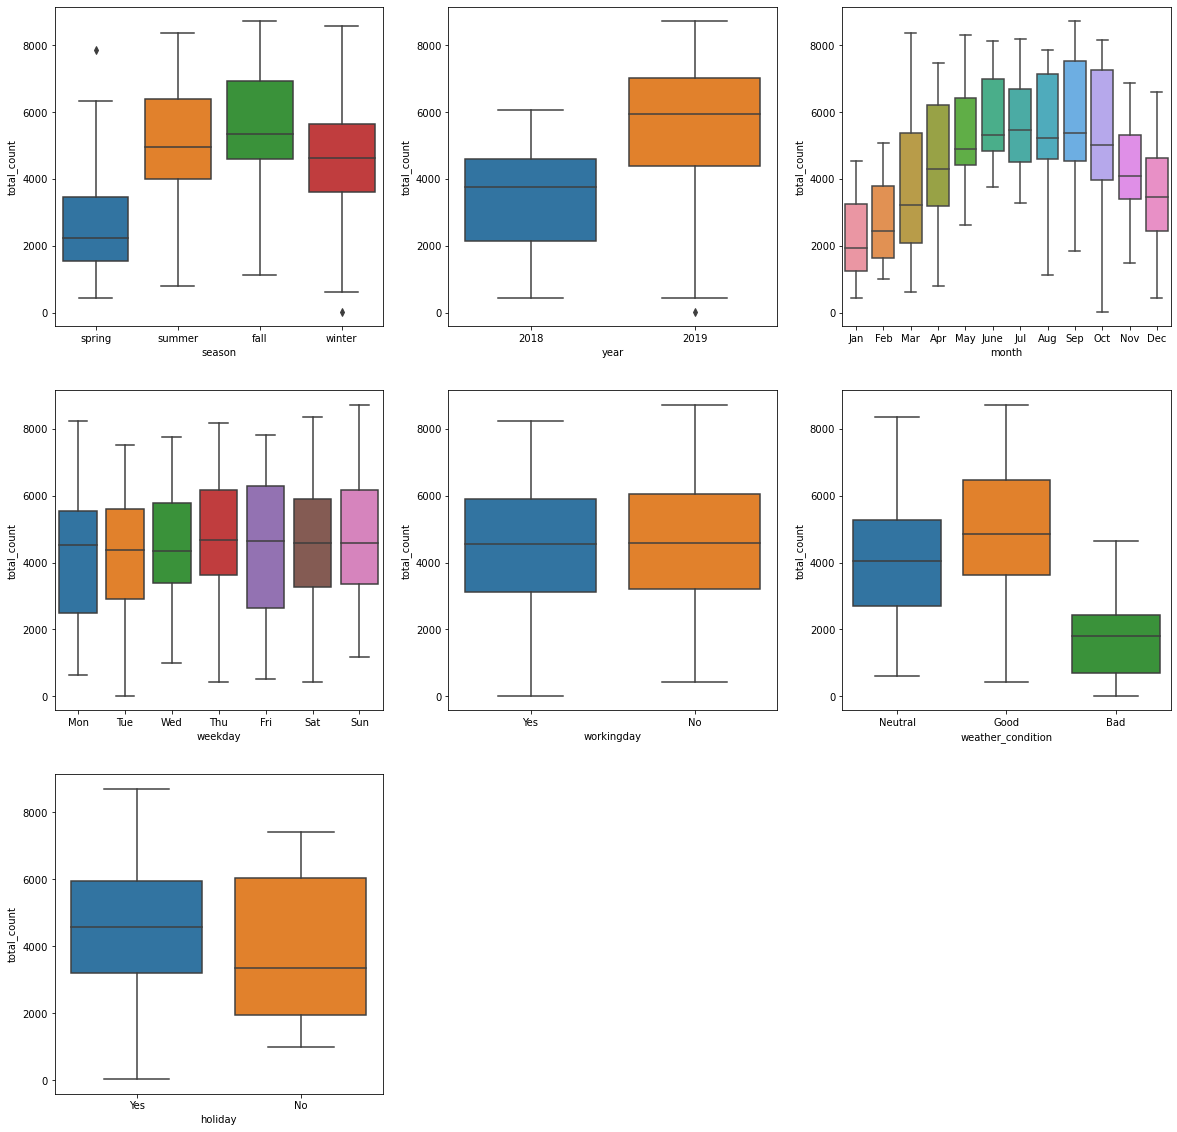

In [22]:
#Box plot is used to study categorical variable effect on the dependent variable (‘total_count’)
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='total_count', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='year', y='total_count', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='month', y='total_count', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='total_count', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='total_count', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weather_condition', y='total_count', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='holiday', y='total_count', data=bike)
plt.show();

##### Insights

Box plot is used to study categorical variable effect on the dependent variable (‘total_count’) .

Following are the inferences:

year: we can see most bookings take place in 2019, shows upward trend, can be used for prediction.

season: Almost 32% of the bike booking were happening in fall with a median of over 5000 booking. This was followed by spring & winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

month: Almost 10% of the bike booking were happening in the months May, June, July, Aug & Sept with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weather_condition: Almost 67% of the bike booking were happening durings Good weather_condition with a median of close to 5000 booking. This was followed by Neutral weather_conditions with 30% of total booking, indicates, weather_condition does show some trend towards the bike bookings, good predictor for dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday cannot be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking, indicates, workingday can be a good predictor for dependent variable

### Feature Engineering

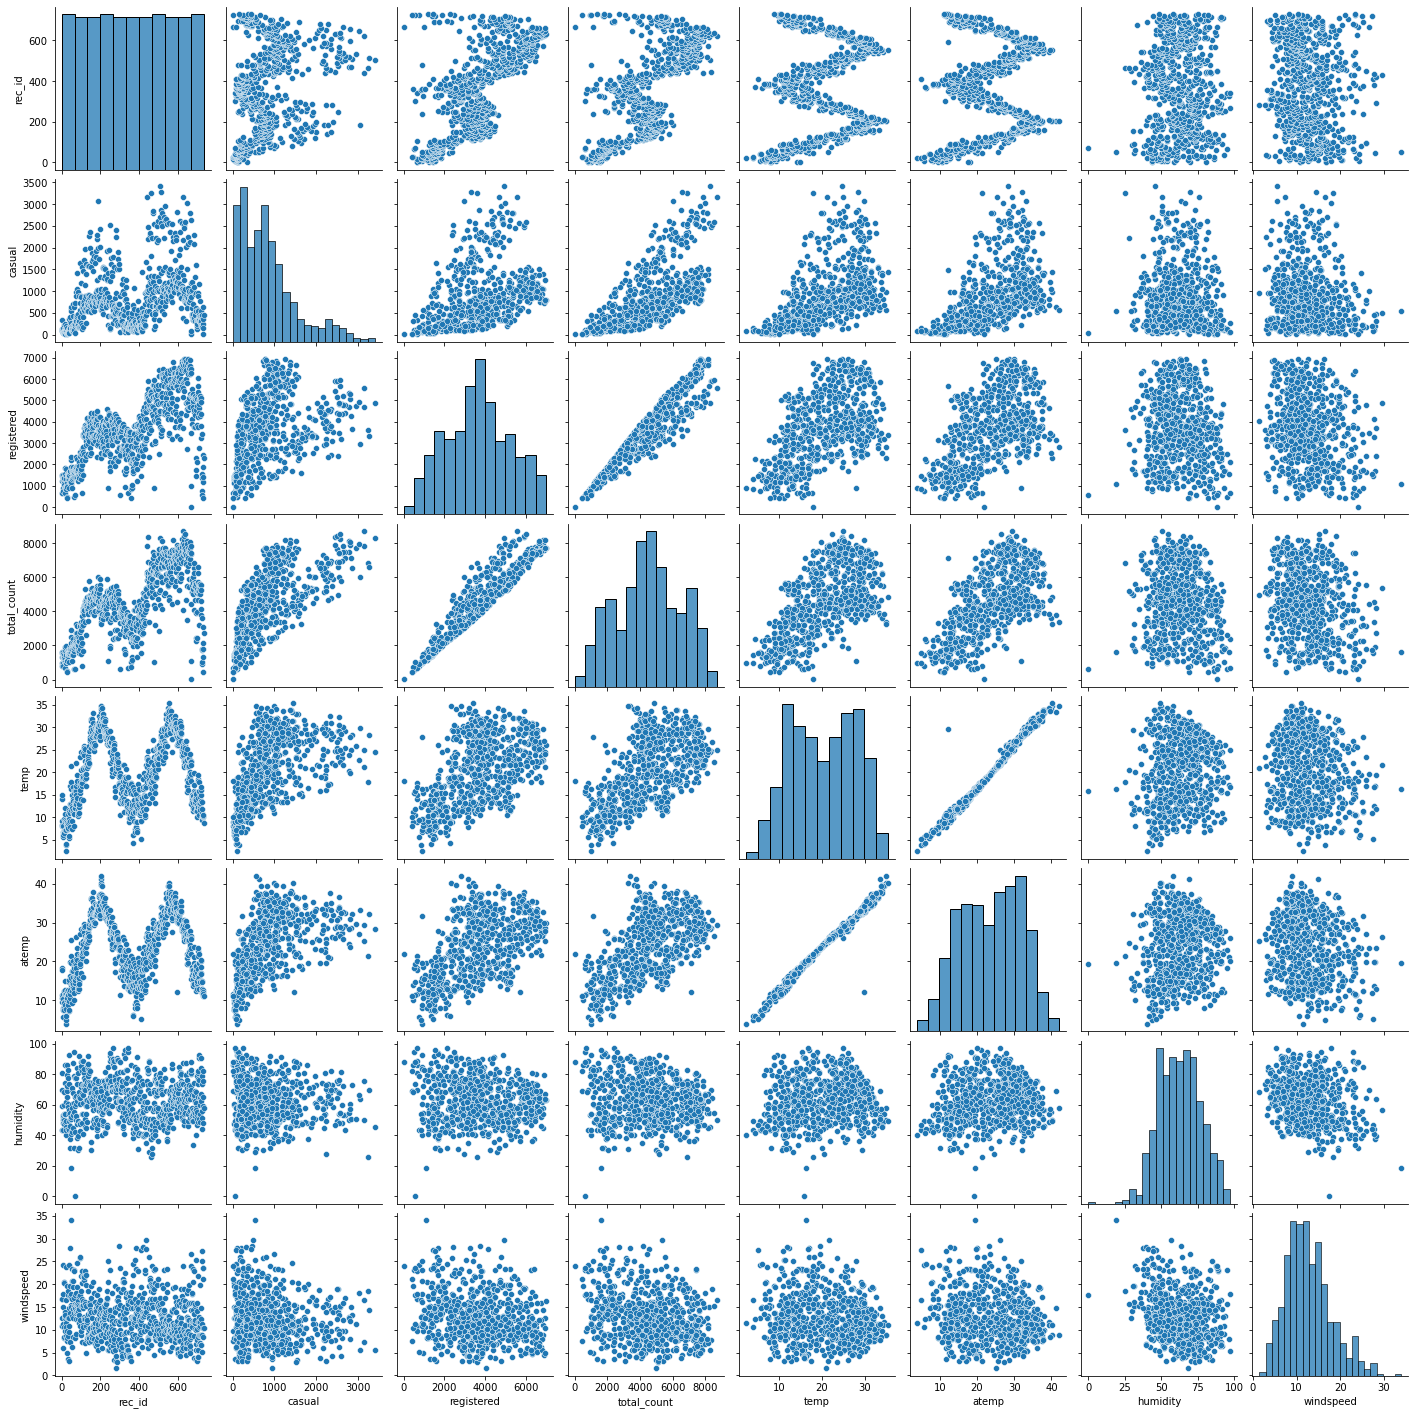

In [23]:
sns.pairplot(bike[numeric_col])
plt.show();

##### Insights

The above Pair-Plot shows that there is a linear realtion between 'temp','atemp' and 'total_count'

Casual and Registred users do appear to have high correlation to the dependent 'total_count' variable but that is because count is a summation of both these categories. So, we will ignore this relationship

In [24]:
cor = bike[['rec_id',
 'casual',
 'registered',
 'total_count',
 'temp',
 'atemp',
 'humidity',
 'windspeed']].corr()
cor

,rec_id,casual,registered,total_count,temp,atemp,humidity,windspeed
rec_id,1.000000,0.275604,0.660544,0.629896,0.150738,0.152773,0.016080,-0.112667
casual,0.275604,1.000000,0.394137,0.672123,0.542731,0.543362,-0.075211,-0.167995
registered,0.660544,0.394137,1.000000,0.945411,0.539436,0.543678,-0.089212,-0.217914
total_count,0.629896,0.672123,0.945411,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.150738,0.542731,0.539436,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.152773,0.543362,0.543678,0.630685,0.991696,1.000000,0.141512,-0.183876
humidity,0.016080,-0.075211,-0.089212,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.112667,-0.167995,-0.217914,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


In [25]:
mask = np.array(cor)

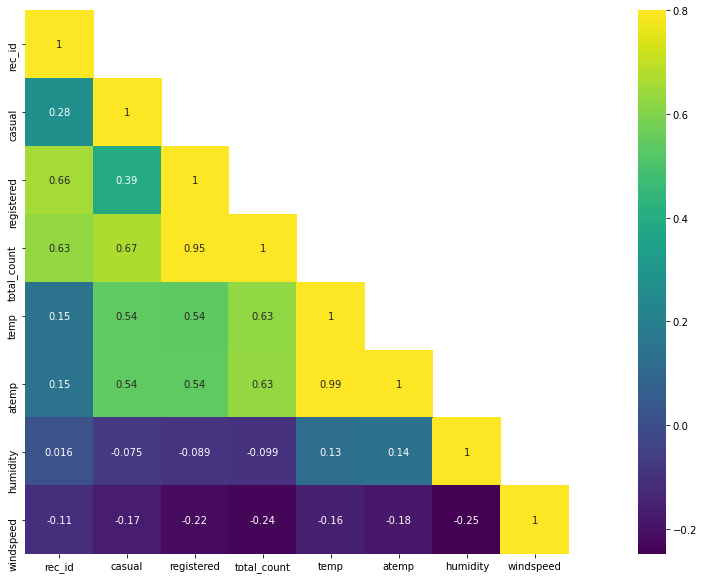

In [26]:
#ploting heat map to find collinearity
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (25,10))
sns.heatmap(cor, mask=mask, vmax=.8, square=True, annot=True,cmap='viridis');

##### Insights

Casual and Registred users do appear to have high correlation to the dependent 'total_count' variable but that is because total_count is a summation of the both, ignore this relationship. 

There is the high correlation between 'temp' and 'atemp' which can cause multicollinearity in the model. Therefore, will only consider one varible 'temp'.

Record_index too has some degree of correlation with total_count and registered, but the varriable is of use for the model

In [27]:
# Removing atemp and rec_id
un_col = ['rec_id', 'atemp']
bike = bike.drop(labels= un_col,axis=1)

In [28]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               730 non-null    datetime64[ns]
 1   season             730 non-null    object        
 2   year               730 non-null    object        
 3   month              730 non-null    object        
 4   holiday            730 non-null    object        
 5   weekday            730 non-null    object        
 6   workingday         730 non-null    object        
 7   weather_condition  730 non-null    object        
 8   temp               730 non-null    float64       
 9   humidity           730 non-null    float64       
 10  windspeed          730 non-null    float64       
 11  casual             730 non-null    int64         
 12  registered         730 non-null    int64         
 13  total_count        730 non-null    int64         
dtypes: datetim

In [29]:
df_categorical = bike.select_dtypes(exclude=['float64','datetime64','int64'])

In [30]:
dummies = pd.get_dummies(df_categorical, drop_first=True)
dummies

,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_June,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weather_condition_Good,weather_condition_Neutral
0,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
726,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
727,1,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0


In [31]:
bike = bike.drop(list(df_categorical.columns), axis=1)

In [32]:
bike = pd.concat([bike, dummies], axis=1)

In [33]:
bike.head()

,date,temp,humidity,windspeed,casual,registered,total_count,season_spring,season_summer,season_winter,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weather_condition_Good,weather_condition_Neutral
0,2018-01-01,14.110847,80.5833,10.749882,331,654,985,1,0,0,...,1,1,0,0,0,0,0,1,0,1
1,2018-02-01,14.902598,69.6087,16.652113,131,670,801,1,0,0,...,1,0,0,0,0,1,0,1,0,1
2,2018-03-01,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,2018-04-01,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,...,1,0,0,0,1,0,0,1,1,0
4,2018-05-01,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [34]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       730 non-null    datetime64[ns]
 1   temp                       730 non-null    float64       
 2   humidity                   730 non-null    float64       
 3   windspeed                  730 non-null    float64       
 4   casual                     730 non-null    int64         
 5   registered                 730 non-null    int64         
 6   total_count                730 non-null    int64         
 7   season_spring              730 non-null    uint8         
 8   season_summer              730 non-null    uint8         
 9   season_winter              730 non-null    uint8         
 10  year_2019                  730 non-null    uint8         
 11  month_Aug                  730 non-null    uint8         
 12  month_De

In [35]:
# Removing unnecessary columns
un_col = ['casual', 'registered','date']
bike = bike.drop(labels= un_col,axis=1)

In [36]:
# singling out main variable total_count
y = ['total_count']
X = bike.drop(labels= y,axis=1)


In [37]:
y = bike.total_count

In [38]:
# recheckinh x info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temp                       730 non-null    float64
 1   humidity                   730 non-null    float64
 2   windspeed                  730 non-null    float64
 3   season_spring              730 non-null    uint8  
 4   season_summer              730 non-null    uint8  
 5   season_winter              730 non-null    uint8  
 6   year_2019                  730 non-null    uint8  
 7   month_Aug                  730 non-null    uint8  
 8   month_Dec                  730 non-null    uint8  
 9   month_Feb                  730 non-null    uint8  
 10  month_Jan                  730 non-null    uint8  
 11  month_Jul                  730 non-null    uint8  
 12  month_June                 730 non-null    uint8  
 13  month_Mar                  730 non-null    uint8  

In [39]:
X.head()

,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weather_condition_Good,weather_condition_Neutral
0,14.110847,80.5833,10.749882,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,8.200000,59.0435,10.739832,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
4,9.305237,43.6957,12.522300,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [40]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: total_count, dtype: int64

## Modelling

In [41]:
# importing required lib to split data randomly for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
X_train.shape # checking shape

(584, 28)

In [43]:
num_feat = list(X_train.describe().columns)
num_feat

['temp',
 'humidity',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'year_2019',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jan',
 'month_Jul',
 'month_June',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'holiday_Yes',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'workingday_Yes',
 'weather_condition_Good',
 'weather_condition_Neutral']

In [44]:
# Scaling to convert data into normal distribution since Windspeed and humidity had certain degree of skewness to right and left
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_feat] = sc.fit_transform(X_train[num_feat])
X_test[num_feat] = sc.transform(X_test[num_feat])

In [45]:
X_train.head()

,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weather_condition_Good,weather_condition_Neutral
239,1.169798,-0.460004,1.494191,-0.558891,-0.593171,-0.577350,-0.989778,3.268027,-0.30933,-0.278372,...,0.167836,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,0.664812,0.749331,-0.710742
97,-0.849259,1.498668,0.480773,-0.558891,1.685854,-0.577350,-0.989778,-0.305995,-0.30933,-0.278372,...,0.167836,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,-1.504184,-1.334523,1.406980
503,0.587516,-1.212939,-1.385350,-0.558891,1.685854,-0.577350,1.010327,-0.305995,-0.30933,-0.278372,...,0.167836,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,-1.504184,0.749331,-0.710742
642,0.669099,0.009068,-1.093395,-0.558891,-0.593171,1.732051,1.010327,-0.305995,-0.30933,-0.278372,...,0.167836,-0.404162,2.456857,-0.407024,-0.424026,-0.409878,-0.395519,-1.504184,0.749331,-0.710742
498,0.442477,1.165661,0.294182,-0.558891,1.685854,-0.577350,1.010327,-0.305995,-0.30933,-0.278372,...,0.167836,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,0.664812,-1.334523,1.406980


In [46]:
# importing linear regression lib from sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])
coeff.sort_values(by='Coefficients')

,Coefficients
season_spring,-345.358041
workingday_Yes,-291.687666
humidity,-249.803900
windspeed,-237.083691
weekday_Sat,-181.747835
month_Jul,-165.172467
month_Nov,-153.398420
weekday_Sun,-153.111340
month_Dec,-129.695235
month_Jan,-126.067010


In [49]:
reg.intercept_

4492.518835616438

In [50]:
# predicting future y value
y_pred = reg.predict(X_test)

In [51]:
# datafarme of predicted and actual value
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted': y_pred
})
df

,Actual,Predicted
196,5923,4053.640777
187,4592,4699.929247
14,1248,1123.210261
31,1360,1033.427099
390,4075,3658.722219
...,...,...
118,4595,4402.779055
566,4459,3656.224953
688,5634,5110.255082
266,5423,4901.613353


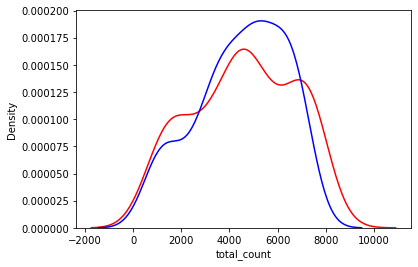

In [56]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [70]:
prediction = reg.predict(X_test)
residuals = (y_test - prediction)

Text(0.5, 0, 'Errors')

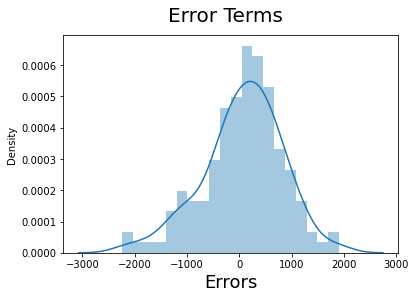

In [76]:
fig = plt.figure()
sns.distplot(residuals,bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

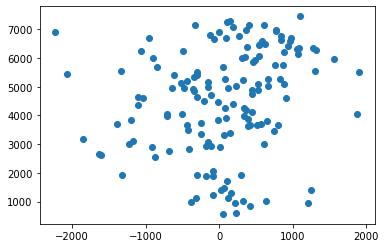

In [71]:
plt.scatter(residuals,y_pred)

plt.show()

In [65]:
from sklearn import metrics

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 592.5103081212916
Mean Squared Error: 573752.4685104524
Root Mean Squared Error: 757.4644998351093


##### MAE: the average of all absolute errors.
##### MSE: takes the distance of all points from the regression line (residuals) and returns the squared average.
##### RMSE: the standard deviation of the residuals

##### R-squared is a goodness-of-fit measure for linear regression models.

In [54]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred)*100,3)

87.04

The model explains about 87% of the variation in our dependent variable

## Insights
1) Temp is the most significant with the largest coefficient.<br>
2)Followed by weathersit_Light Snow & Rain.<br>
3)Bike rentals is more for the month of september<br>
4)The rentals reduce during holidays<br>
5)This indicates that the bike rentals is majorly affected by temperature,season and month.<br>